=================================================

Graded Challenge 4

Nama  : Heru Ramadhan

Batch : HCK - 018

Notebook ini bertujuan untuk memahami konsep regression dengan Linear regression, mempersiapkan data, mengolah dan menggunkannnya kedalam model linear regression, mengimplementasikan linear regression untuk membuat sebuah prediksi. Dataset yan digunakan dapat diakses <a href='https://www.kaggle.com/datasets/brllrb/uber-and-lyft-dataset-boston-ma'>disini</a>

=================================================

# Import Libraries

In [1]:
# Import Libraries yang dibutuhkan
import pandas as pd
import numpy as np

# library untuk visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# library untuk korelasi check
from scipy.stats import kendalltau, spearmanr, chi2_contingency

# libary untuk train test split data
from sklearn.model_selection import train_test_split

# library untuk capping data
from feature_engine.outliers import Winsorizer

# library untuk encoding
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

# library untuk scalling
from sklearn.preprocessing import StandardScaler

# Model 
from sklearn.linear_model import LinearRegression

# Library untuk metrics atau model evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Model Saving
import pickle

# Data Loading

In [2]:
# melakukan penambahan 'raideshare_kaggle.csv' kedalam sebuah dataframe
df = pd.read_csv('/Users/Heru/HCK18/Phase 1/GC4/rideshare_kaggle.csv')

# memperlihatkan 5 row teratas dari dataframe tersebut
df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [3]:
# Melihat informasi mengenai dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

**Setelah melakukan data loading, didapati data sebagai berikut:**
- Data memiliki 57 kolom
- Data berjumlah 693071 baris
- Data memiliki missing values pada kolom price
- Data memiliki 29 tipe float64
- Data memiliki 17 tipe integer
- Data memiliki 11 tipe object

| Nama Kolom                      | Deskripsi                                                                 |
|---------------------------------|----------------------------------------------------------------------------|
| id                              | ID unik untuk setiap data pemesanan.                                        |
| timestamp                       | Waktu ketika data diambil.                                  |
| hour                            | Jam dalam format waktu.                                                     |
| day                             | Hari dalam format waktu.                                                    |
| month                           | Bulan dalam format waktu.                                                   |
| datetime                        | Tanggal dan waktu lengkap.                                                  |
| timezone                        | Zona waktu tempat data diambil.                                             |
| source                          | Lokasi awal perjalanan.                                           |
| destination                     | Tujuan akhir perjalanan.                                                   |
| cab_type                        | Jenis layanan.                                       |
| product_id                      | ID produk layanan.                                                   |
| name                            | Nama produk layanan.                                                 |
| price                           | Harga perjalanan.                                                          |
| distance                        | Jarak perjalanan.                                       |
| surge_multiplier                | Faktor pengali lonjakan harga.                                   |
| latitude                        | Koordinat lintang lokasi.                                                  |
| longitude                       | Koordinat bujur lokasi.                                                    |
| temperature                     | Temperatur di lokasi saat perjalanan.                                       |
| apparentTemperature             | Suhu yang dirasakan saat perjalanan.                                       |
| short_summary                   | Ringkasan cuaca singkat.                                                   |
| long_summary                    | Ringkasan cuaca panjang.                                                   |
| precipIntensity                 | Intensitas presipitasi (hujan/salju).                                      |
| precipProbability               | Probabilitas presipitasi.                                                  |
| humidity                        | Kelembaban udara saat perjalanan.                                          |
| windSpeed                       | Kecepatan angin.                                                           |
| windGust                        | Kecepatan angin puncak.                                                    |
| windGustTime                    | Waktu kecepatan angin puncak terjadi.                                      |
| visibility                      | Jarak pandang saat perjalanan.                                             |
| temperatureHigh                 | Suhu maksimum.                                                    |
| temperatureHighTime             | Waktu suhu maksimum terjadi.                                               |
| temperatureLow                  | Suhu minimum.                                                     |
| temperatureLowTime              | Waktu suhu minimum terjadi.                                                |
| apparentTemperatureHigh         | Suhu yang dirasakan maksimum.                                              |
| apparentTemperatureHighTime     | Waktu suhu yang dirasakan maksimum terjadi.                                |
| apparentTemperatureLow          | Suhu yang dirasakan minimum.                                               |
| apparentTemperatureLowTime      | Waktu suhu yang dirasakan minimum terjadi.                                 |
| icon                            | Ikon yang menunjukkan kondisi cuaca.                                      |
| dewPoint                        | Titik embun.                                                               |
| pressure                        | Tekanan udara.                                                             |
| windBearing                     | Arah angin.                                                                |
| cloudCover                      | Tutupan awan.                                                              |
| uvIndex                         | Indeks UV.                                                                 |
| visibility.1                    | Jarak pandang tambahan.                                                    |
| ozone                           | Konsentrasi ozon.                                                          |
| sunriseTime                     | Waktu matahari terbit.                                                     |
| sunsetTime                      | Waktu matahari terbenam.                                                   |
| moonPhase                       | Fase bulan.                                                                |
| precipIntensityMax              | Intensitas presipitasi maksimum.                                           |
| uvIndexTime                     | Waktu indeks UV terjadi.                                                   |
| temperatureMin                  | Suhu minimum.                                                              |
| temperatureMinTime              | Waktu suhu minimum terjadi.                                                |
| temperatureMax                  | Suhu maksimum.                                                             |
| temperatureMaxTime              | Waktu suhu maksimum terjadi.                                               |
| apparentTemperatureMin          | Suhu yang dirasakan minimum.                                               |
| apparentTemperatureMinTime      | Waktu suhu yang dirasakan minimum terjadi.                                 |
| apparentTemperatureMax          | Suhu yang dirasakan maksimum.                                              |
| apparentTemperatureMaxTime      | Waktu suhu yang dirasakan maksimum terjadi.                                |


In [4]:
# cek duplikat pada data
print('jumlah duplikasi data: ', df.duplicated().sum())

# cek missing values pada data
print('jumlah missing value pada data: ')
print(df.isnull().sum())

jumlah duplikasi data:  0
jumlah missing value pada data: 
id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust        

**Setelah melakukan pengecekan terhadap duplikasi data dan missing values, didapati data sebagai berikut:**
- tidak terdapat duplikasi data pada dataframe tersebut
- terdapat missing value pada kolom price sebanyak 55.095 baris

# Exploratory Data Analysis (EDA)

In [5]:
# melakukan copy pada dataframe
df1 = df.copy()

# memperlihatkan 5 row teratas dari dataframe tersebut
df1.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


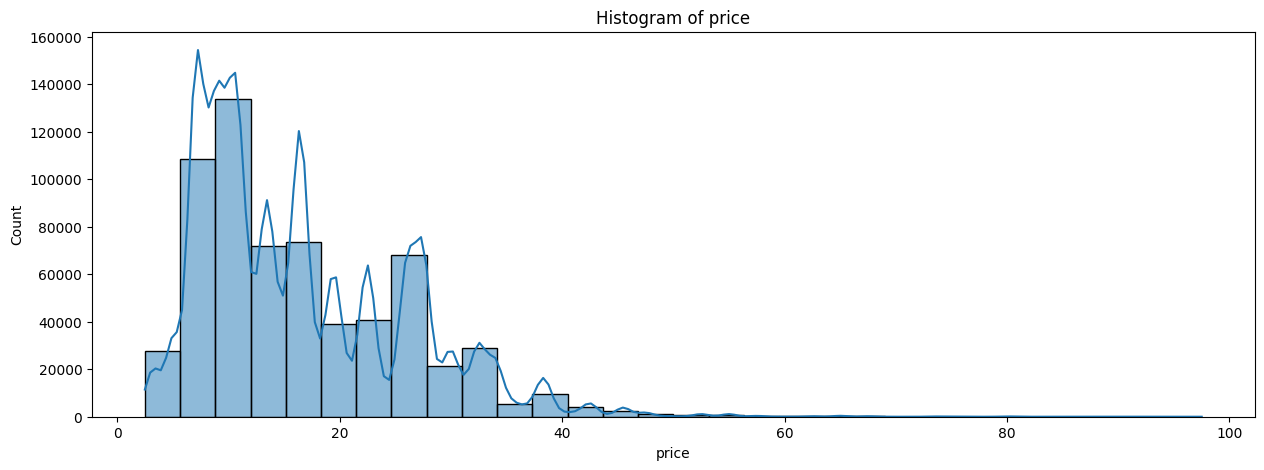

In [6]:
plt.figure(figsize=(15,5))
sns.histplot(df1['price'], kde=True,bins=30)
plt.title('Histogram of price')
plt.show()

dari histogram diatas dapat dilihat persebaran distribusi data pada kolom price cenderung kearah kanan dan memiliki rentang nilai hingga 100

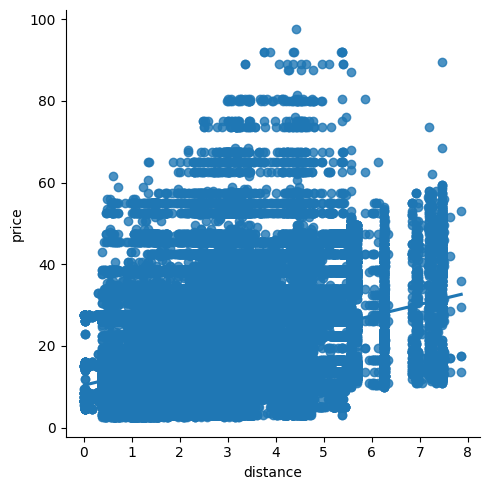

In [7]:
sns.lmplot(data=df1,y='price',x='distance')

Berdasarkan visualiasi data scatterplot diatas, saat ini belum bisa ditarik kesimpulan mengenai adanya korelasi diantara variabel distance dan price

## Top Destination

In [8]:
# melakukan groupby kolom destination berasarkan jumlah baris
topDestination = df1.groupby('destination')['id'].count().sort_values(ascending=False).reset_index()

# bar chart
fig = px.bar(topDestination, x="destination", y="id",text_auto='.2s', orientation='v')
fig.update_yaxes(range = [50000,65000])
fig.show()

# melihatkan isi variabel topDestination
topDestination

,destination,id
0,Financial District,58851
1,Theatre District,57798
2,Back Bay,57780
3,Boston University,57764
4,Haymarket Square,57764
5,Fenway,57757
6,North End,57756
7,Northeastern University,57755
8,South Station,57749
9,West End,57575


**Berdasarkan informasi bar chart diatas, dapat disimpulkan bahwa:**<br>
- Financial District sebagai destinasi terbanyak customer
- North Station sebagai destinasi terendah 
- perbedaan jumlah antar destination tidak terlalu jauh kecuali Financial Dsitrict

## Average Price

In [9]:
# groupby nama layanan dengan price berdasarkan average
avgPrice = df1.groupby('name')['price'].mean().sort_values(ascending=False).reset_index()

fig = px.bar(avgPrice, x="name", y="price", orientation='v')
fig.show()

# memperlihatkan isi variable avgproce
avgPrice

,name,price
0,Lux Black XL,32.324086
1,Black SUV,30.286763
2,Lux Black,23.062468
3,Black,20.523786
4,Lux,17.771240
5,UberXL,15.678144
6,Lyft XL,15.309363
7,UberX,9.765074
8,WAV,9.765019
9,Lyft,9.610885


**Berdasarkan informasi bar chart diatas, dapat disimpulkan bahwa:**<br>
- Rata rata harga paling tinggi terdapat pada layanan `Lux Black XL` dan `Black SUV` yang memiliki rata rata yang tidak jauh beda
- Terdapat missing values pada kolom `Taxi`, maka akan dilakukan handling missing value sebelum melakukan split data

## Cab Type

In [10]:
# melakukan group by kolom cab_type berdasarkan id 
topCab = df1.groupby('cab_type')['id'].count().sort_values(ascending=False).reset_index()

fig = px.pie(topCab, names="cab_type", 
              values="id", 
              title="Cab Type",
              hover_data=["id"], 
              )
fig.show()

# memperlihat isi variabel topCab
topCab

,cab_type,id
0,Uber,385663
1,Lyft,307408


**Berdasarkan informasi pie chart diatas, dapat disimpulkan bahwa:**<br>
- Terdapat 2 tipe cab atau perusahaan yaitu `uber` dan `lyft`
- `uber` memiliki jumlah lebih banyak dengan total 55.6% atau 385.663 
- `lyft` memiliki jumlah lebih sedikit dengan total 44.4% atau 307.408 

## Class Type

In [11]:
# melakukan group by kolom name dengan id dengan cara menghitung semua baris id nya
topName = df1.groupby('name')['id'].count().sort_values(ascending=False).reset_index()

fig = px.bar(topName, x="name", y="id", orientation='v', text_auto='.2s')
fig.update_yaxes(range = [40000,60000])
fig.show()

# memperlihat isi variabel topName
topName

,name,id
0,Black SUV,55096
1,WAV,55096
2,UberXL,55096
3,Black,55095
4,Taxi,55095
5,UberX,55094
6,UberPool,55091
7,Lux,51235
8,Lux Black,51235
9,Lux Black XL,51235


**Berdasarkan informasi bar chart diatas, dapat disimpulkan bahwa:**<br>
- terdapat 13 jenis layanan
- layanan `Black SUV`, `WAV`, `UberXL`, `Black`, `Taxi` menjadi layanan yang paling banyak digunakan
- layanan `Lux`, `Lux Black`, `Lux Black XL`, `Lyft`, `Lyft XL`, `Shared` menjadi layanan yang paling sedikit digunakan dan memiliki total baris yang sama

## Weather type

In [12]:
# groupby kolom short_summary yang berisikan tipe cuaca dengan total baris id
weather = df1.groupby('short_summary')['id'].count().sort_values(ascending=False).reset_index()

fig = px.bar(weather, x="short_summary", y="id", orientation='v')
fig.show()

# memperlihat isi variabel weather
weather

,short_summary,id
0,Overcast,218895
1,Mostly Cloudy,146210
2,Partly Cloudy,127224
3,Clear,87126
4,Light Rain,54912
5,Rain,23712
6,Possible Drizzle,18636
7,Foggy,9060
8,Drizzle,7296


**Berdasarkan informasi bar chart diatas, dapat disimpulkan bahwa:**<br>
- Transaksi paling banyak dilakukan saat cuaca `Overcast`
- Transaksi paling sedikit dilakukan saat cuaca `Drizzle`

# Feature Engineering

In [13]:
# melakukan copy pada data asli sehingga tidak merusak data utama
df3 = df.copy()

# memperlihatkan isi dataframe yang sudah dicopy
df3

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693066,616d3611-1820-450a-9845-a9ff304a4842,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693067,633a3fc3-1f86-4b9e-9d48-2b7132112341,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693068,64d451d0-639f-47a4-9b7c-6fd92fbd264f,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693069,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800


### Handling Missing Values

#### Missing Data Mechanisms

Setelah melakukan Exploratory pada data, didapati adanya missing values pada kolom price. semua missing values yang ada pada price terjadi pada layanan berjenis taxi. <br>
Maka berdasarkan hasil EDA, Missing value pada data ini dapat dikategorikan sebagai `Missing at Random (MAR)`. adapun karakteristik MAR diantaranya adalah: <br>
- The probability an observation being missing depends only on available information.
- There is a systematic relationship between the propensity of missing values and the observed data. <br>

Missing value pada data ini memenuhi atau memiliki karakteristik tersebut

In [14]:
# melihat jumlah missing value pada dataframe 
df3.isnull().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

Terdapat 55.095 missing value pada kolom price

In [15]:
# Melakukan drop missing value pada dataframe df3
df3.dropna(inplace=True)

In [16]:
# melihat jumlah missing value pada dataframe 
df3.isnull().sum()

id                             0
timestamp                      0
hour                           0
day                            0
month                          0
datetime                       0
timezone                       0
source                         0
destination                    0
cab_type                       0
product_id                     0
name                           0
price                          0
distance                       0
surge_multiplier               0
latitude                       0
longitude                      0
temperature                    0
apparentTemperature            0
short_summary                  0
long_summary                   0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
windGustTime                   0
visibility                     0
temperatureHigh                0
temperatureHighTime            0
temperatur

Missing value berhasil dihapus.

## Cardinal Test

In [17]:
# membuat function untuk cek cardinalitas data
def cardinality_func(dataframe):

    # membuat empty list
    columns = []
    nunique = []
    unique = []

    # memilih kolom bertipe object
    cat_columns = dataframe.select_dtypes(include=['object'])
    for column in cat_columns:
        columns.append(column)
        nunique.append(dataframe[column].nunique())
        unique.append(dataframe[column].unique())

    # membuat dataframe 
    cardinality_df = pd.DataFrame({
    'nama kolom' : columns,
    'jumlah unique' : nunique,
    'unique':unique})

    return cardinality_df

# memanggil function 
cardinality_func(df3)

,nama kolom,jumlah unique,unique
0,id,637976,"[424553bb-7174-41ea-aeb4-fe06d4f4b9d7, 4bd2305..."
1,datetime,31350,"[2018-12-16 09:30:07, 2018-11-27 02:00:23, 201..."
2,timezone,1,[America/New_York]
3,source,12,"[Haymarket Square, Back Bay, North End, North ..."
4,destination,12,"[North Station, Northeastern University, West ..."
5,cab_type,2,"[Lyft, Uber]"
6,product_id,12,"[lyft_line, lyft_premier, lyft, lyft_luxsuv, l..."
7,name,12,"[Shared, Lux, Lyft, Lux Black XL, Lyft XL, Lux..."
8,short_summary,9,"[ Mostly Cloudy , Rain , Clear , Partly Clo..."
9,long_summary,11,"[ Rain throughout the day. , Rain until morni..."


**Cardinatily test**
- `id`: Kolom ini memiliki 637,976 nilai unique, menunjukkan identitas unique untuk setiap entri dalam dataset.

- `datetime`: Terdapat 31,350 nilai unique dalam kolom ini, menunjukkan banyaknya timestamp yang berbeda dalam rentang waktu tertentu.

- `timezone`: Hanya memiliki satu nilai unique, yaitu "America/New_York", menunjukkan zona waktu tetap untuk data dalam dataset.

- `source` dan `destination`: Masing-masing memiliki 12 nilai unique, menunjukkan jumlah lokasi atau titik awal dan tujuan yang tetap dalam data.

- `cab_type`: Memiliki 2 nilai unique, "Lyft" dan "Uber", menunjukkan dua jenis layanan taksi yang tersedia dalam dataset.

- `product_id` dan name: Masing-masing memiliki 12 nilai unique, menunjukkan berbagai produk layanan taksi dan nama-nama yang terkait.

- `short_summary`: Terdapat 9 nilai unique yang menggambarkan ringkasan cuaca dalam kata-kata singkat.

- `long_summary`: Memiliki 11 nilai unique yang memberikan deskripsi lebih panjang tentang kondisi cuaca.

- `icon`: Terdapat 7 nilai unique yang mewakili ikon grafis yang digunakan untuk menggambarkan kondisi cuaca.

Nilai kardinalitas yang tinggi terdapat pada kolom `id` dan `datetime`, dimana `datetime` dapat diwakilkan oleh kolom yang lain seperti kolom `hour` `day` `month`

## Split Train Test

In [18]:
# Melakukan split data menjadi X dan Y
# X berisi kolom selain target
X = df3.drop(['price'],axis=1)

# Y berisi kolom target
y = df3['price']

In [19]:
# melakukan split data dengan menggunakan 15% data sebagai data testing dan randomisasi 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=14)

In [20]:
# display top 5 row data
X_train.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
134000,ff192547-e09e-43bc-b002-fbefea3d83d7,1.544786e+09,11,14,12,2018-12-14 11:20:09,America/New_York,Haymarket Square,Theatre District,Uber,...,0.0000,1544806800,27.21,1544781600,46.63,1544814000,24.55,1544785200,43.84,1544817600
682350,5c3165cf-b560-46ba-958a-8e6c2b1d4898,1.544938e+09,5,16,12,2018-12-16 05:20:04,America/New_York,Fenway,North Station,Lyft,...,0.1257,1544979600,38.48,1544954400,43.61,1544990400,34.01,1545019200,38.37,1544986800
46847,641e8e67-a3d4-463e-b414-daa7a12c0edd,1.544879e+09,12,15,12,2018-12-15 12:55:09,America/New_York,Northeastern University,Financial District,Uber,...,0.0079,1544893200,39.71,1544929200,54.43,1544896800,36.49,1544929200,53.76,1544896800
449177,48fa6d3f-cdb8-4dff-b9f4-ef3709efb99d,1.543424e+09,17,28,11,2018-11-28 17:01:25,America/New_York,West End,Boston University,Lyft,...,0.0000,1543420800,33.70,1543399200,42.57,1543438800,29.94,1543399200,36.55,1543438800
64437,eb88ef7e-3d61-4d2d-bf3d-72980e1e61b0,1.545040e+09,9,17,12,2018-12-17 09:40:12,America/New_York,Haymarket Square,Beacon Hill,Uber,...,0.0185,1545066000,34.07,1545044400,41.39,1545076800,28.17,1545044400,35.93,1545076800


In [21]:
# Check ukuran data
print(f'Train set : {X_train.shape}')
print(f'test set : {X_test.shape}')

Train set : (542279, 56)
test set : (95697, 56)


- Ukuran Train set memiliki 542.279 baris dan 56 kolom
- Ukuran Test set memiliki 95.697 baris dan 56 kolom

## Outlier Handling

In [22]:
# Membuat function untuk menghitung nilai skew, upper dan lower boundary, dan outlier
def outlier_analysis(data):

    # membuat dataframe dan empty list
    result = pd.DataFrame()
    col_name = []
    skew = []
    upper = []
    lower = []
    type = []
    has_outliers = [] 

    # menseleksi kolom dengan memilih numerik kolom saja
    num_columns = data.select_dtypes(include=['int64','float64'])

    # melakukan pengecualian terhadap beberapa kolom yang merupakan kolom categorical 
    num_columns1 = num_columns[num_columns.columns.difference(['timezone', 'surge_multiplier', 'latitude', 'longitude','precipIntensity', 'precipProbability',
        'uvIndex','uvIndexTime'
        ])]
    # Loop 
    for col in num_columns1:
        col_name.append(col)

        # skewness
        skew_val = data[col].skew()
        skew.append(skew_val)

        # extreme skewed upper and lower boundaries
        if skew_val > 1 or skew_val < -1:
            IQR = data[col].quantile(0.75) - data[col].quantile(0.25)

            lower_boundary = data[col].quantile(0.25) - (IQR * 3)
            upper_boundary = data[col].quantile(0.75) + (IQR * 3)
            type.append('extreme skew')

        # Moderate skewed
        elif skew_val >= 0.5 or skew_val <= -0.5:
            IQR = data[col].quantile(0.75) - data[col].quantile(0.25)

            lower_boundary = data[col].quantile(0.25) - (IQR * 1.5)
            upper_boundary = data[col].quantile(0.75) + (IQR * 1.5)
            type.append('moderate skew')

        # Normal
        else:
            std = data[col].quantile(0.75) - data[col].quantile(0.25)

            lower_boundary = data[col].mean() - (std * 3)
            upper_boundary = data[col].mean() + (std * 3)
            type.append('normal skew')
        
        # append nilai upper dan lower ke empty list 
        upper.append(upper_boundary)
        lower.append(lower_boundary)
        
        # pengecekan outlier
        outliers = (data[col] < lower_boundary) | (data[col] > upper_boundary)
        has_outliers.append(any(outliers))

    # Menambahkan list sebelumnya ke dalam sebuah dataframe
    result['columns'] = col_name
    result['skewness'] = skew
    result['upper boundary'] = upper
    result['lower boundary'] = lower
    result['skew type'] = type
    result['has_outliers'] = has_outliers  

    return result

# memanggil function dan membuat variabel baru
X_train_boundaries = outlier_analysis(X_train)

# memanggil variabel
X_train_boundaries

,columns,skewness,upper boundary,lower boundary,skew type,has_outliers
0,apparentTemperature,-0.393097,6.039315e+01,1.137315e+01,normal skew,False
1,apparentTemperatureHigh,0.070545,6.425807e+01,1.895807e+01,normal skew,False
2,apparentTemperatureHighTime,0.427968,1.548186e+09,1.539913e+09,normal skew,False
3,apparentTemperatureLow,-0.500867,4.675000e+01,1.627000e+01,moderate skew,True
4,apparentTemperatureLowTime,0.438634,1.548170e+09,1.540027e+09,normal skew,False
5,apparentTemperatureMax,0.611116,5.544500e+01,2.524500e+01,moderate skew,True
6,apparentTemperatureMaxTime,0.422123,1.548184e+09,1.539911e+09,normal skew,False
7,apparentTemperatureMin,-1.107823,5.956000e+01,3.910000e+00,extreme skew,False
8,apparentTemperatureMinTime,0.449742,1.548216e+09,1.539879e+09,normal skew,False
9,cloudCover,-0.733129,1.945000e+00,-5.750000e-01,moderate skew,False


**Berdasarkan data tersebut dapat disimpulkan bahwa:**
- Hanya ada 7 kolom yang memiliki outlier
- Terdapat 26 kolom dengan distribusi data normal yaitu:
    -   apparentTemperatureHighTime
    -    apparentTemperatureMaxTime
    -   apparentTemperatureMinTime
    -  cloudCover
    - day
    - dewPoint
    - hour
    - humidity
    - month
    - moonPhase
    - ozone
    - pressure
    - sunriseTime
    - sunsetTime
    - temperatureHigh
    - temperatureHighTime
    - temperatureLow
    - temperatureLowTime
    - temperatureMax
    - temperatureMaxTime
    - temperatureMinTime
    - timestamp
    - windBearing
    - windGust
    - windGustTime
    - windSpeed

- Terdapat 7 kolom dengan moderate skew yaitu: 
    - apparentTemperature
    - apparentTemperatureLow
    - apparentTemperatureMax
    - distance
    - temperature
    - temperatureLow
    - temperatureMin

- Terdapat 2 kolom dengan extreme skew yaitu:
    - visibility
    - visibility.1


In [23]:
test = X_train_boundaries[(X_train_boundaries['has_outliers']==True)]['columns'].tolist()
test

['apparentTemperatureLow',
 'apparentTemperatureMax',
 'distance',
 'temperature',
 'temperatureMin',
 'visibility',
 'visibility.1']

`apparentTemperatureLow`:

- Mempunyai distribusi moderate skew dan adanya nilai outliers.

`apparentTemperatureMax`:

- Mempunyai distribusi moderate skew dan adanya nilai outliers.

`distance`:

- Mempunyai distribusi moderate skew dan adanya nilai outliers.

`temperature`:

- Mempunyai distribusi moderate skew dan adanya nilai outliers.

`temperatureMin`:

- Mempunyai distribusi moderate skew dan adanya nilai outliers.

`visibility`:

- Mempunyai distribusi extreme skew dan adanya nilai outliers.

`visibility.1`:

- Mempunyai distribusi extreme skew dan adanya nilai outliers.

In [24]:
# filter data yang mempunyai distribusi normal
normalskew = X_train_boundaries[(X_train_boundaries['skew type']=='normal skew')]['columns'].tolist()

# Capping distribusi normal
winsoriser_fare = Winsorizer(
    capping_method='gaussian',
    tail='both',
    fold=3,
    variables=normalskew
)

X_train_capped = winsoriser_fare.fit_transform(X_train)
X_test_capped = winsoriser_fare.transform(X_test)

In [25]:
# filter data yang mempunyai distribusi moderate dan extreme
restskew = X_train_boundaries[(X_train_boundaries['skew type']=='extreme skew')]['columns'].tolist() + ['apparentTemperatureLow', 'apparentTemperatureMax','cloudCover', 'distance', 'precipIntensityMax','temperature', 'windBearing','temperatureMin'  ]
# Capping 
winsoriser_fare = Winsorizer(
    capping_method='iqr',
    tail='both',
    fold=1.5,
    variables=restskew
)

X_train_capped = winsoriser_fare.fit_transform(X_train_capped)
X_test_capped = winsoriser_fare.transform(X_test_capped)

In [26]:
# function untuk membuat histogram dan boxplot
def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

apparentTemperatureLow - Before Capping


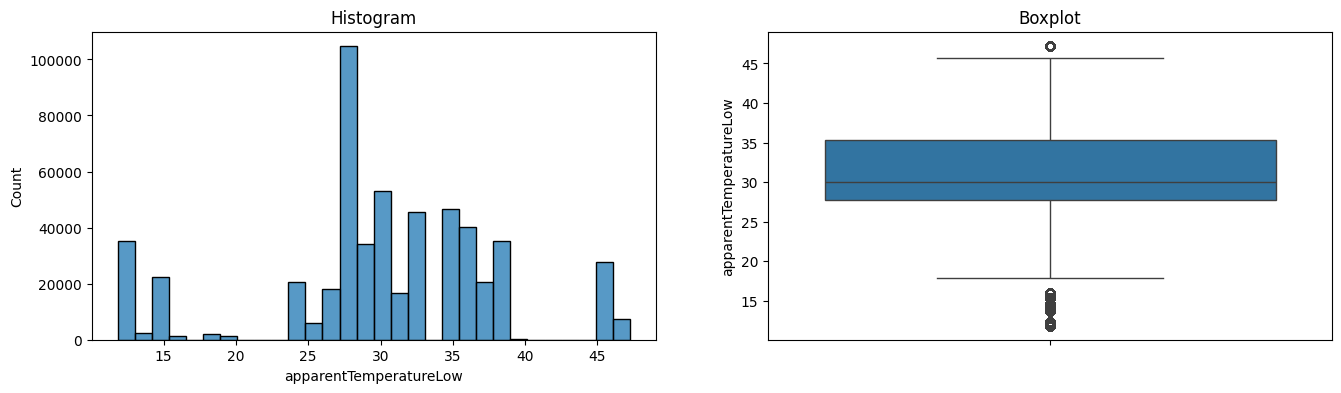


apparentTemperatureLow - After Capping


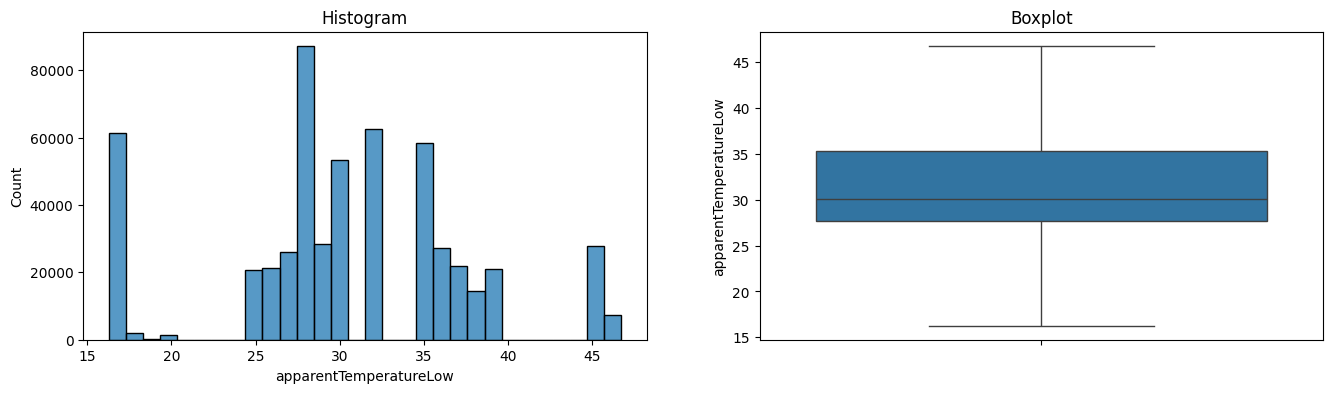

apparentTemperatureMax - Before Capping


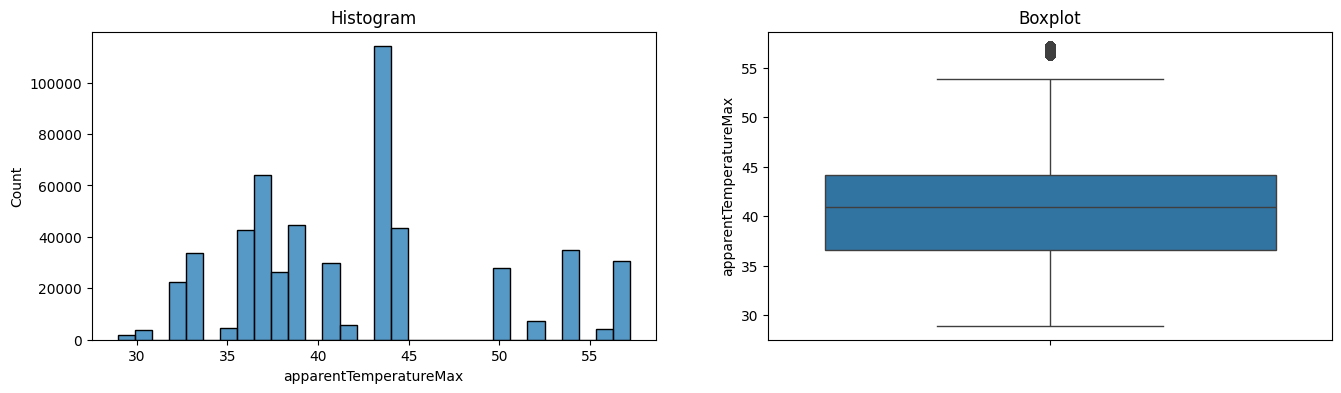


apparentTemperatureMax - After Capping


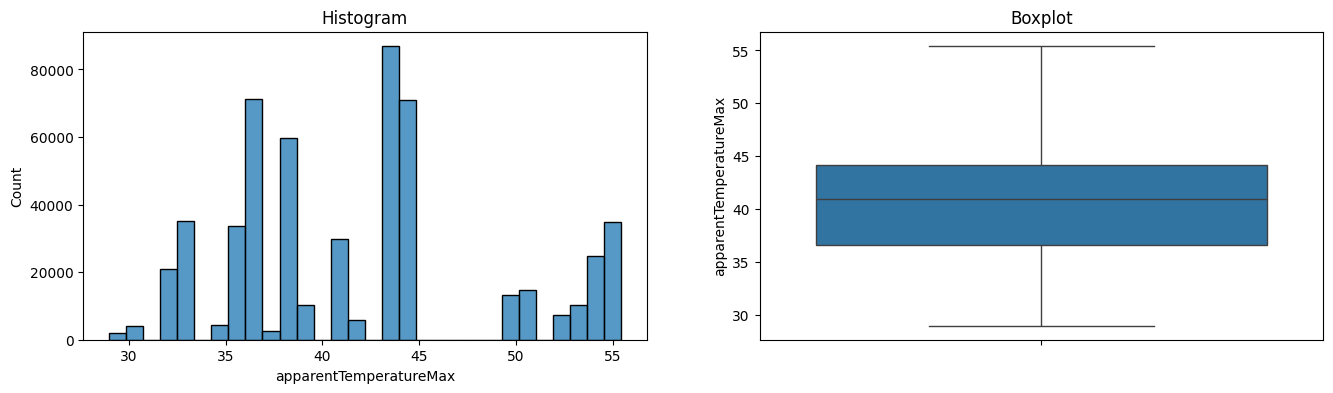

distance - Before Capping


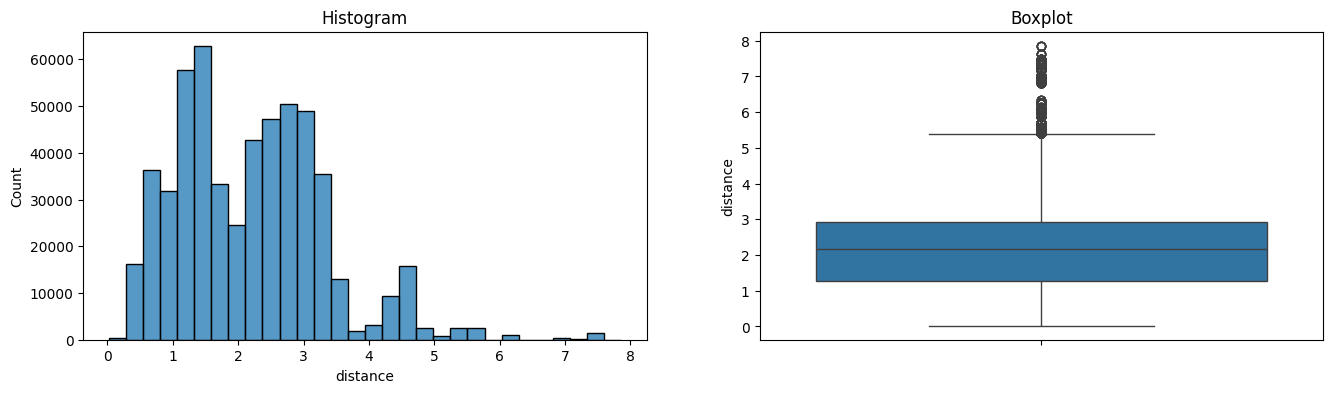


distance - After Capping


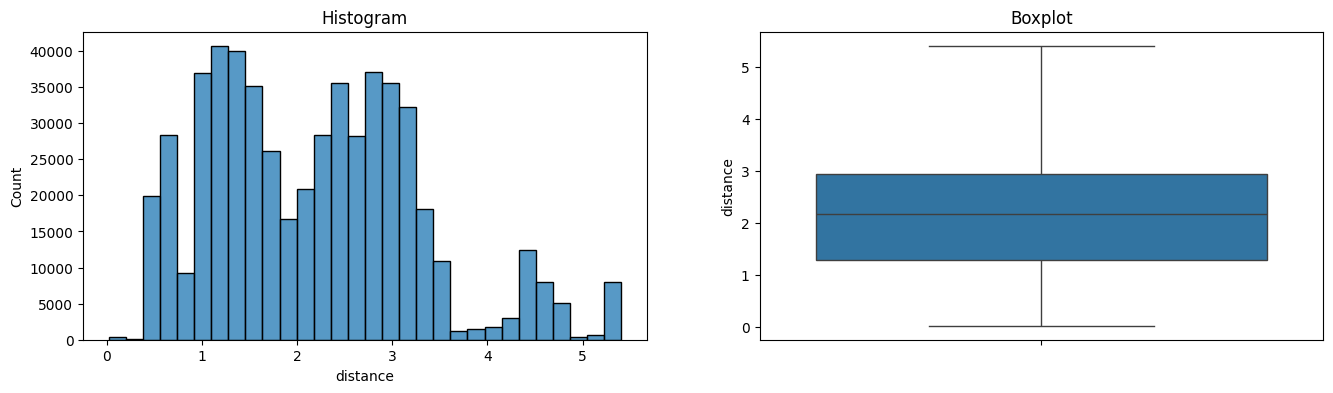

temperature - Before Capping


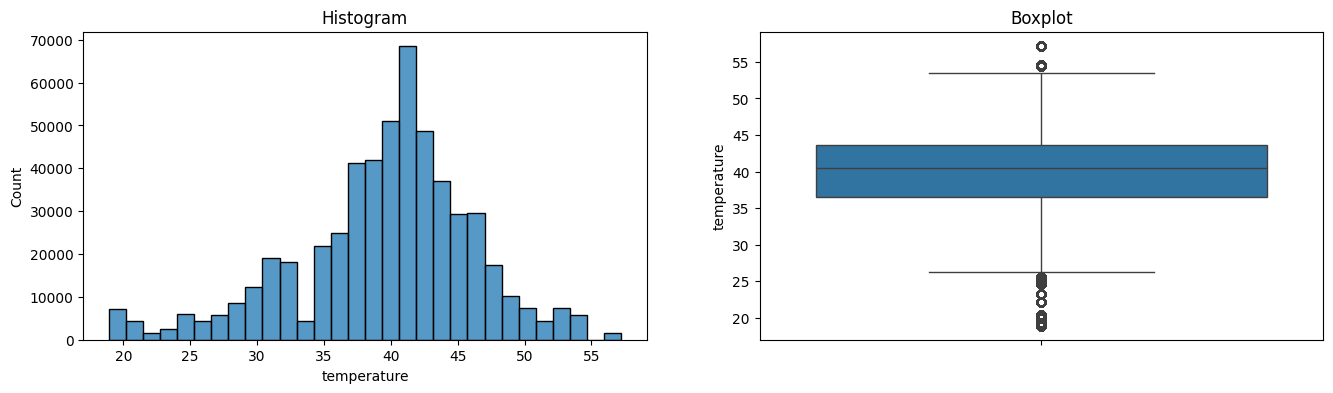


temperature - After Capping


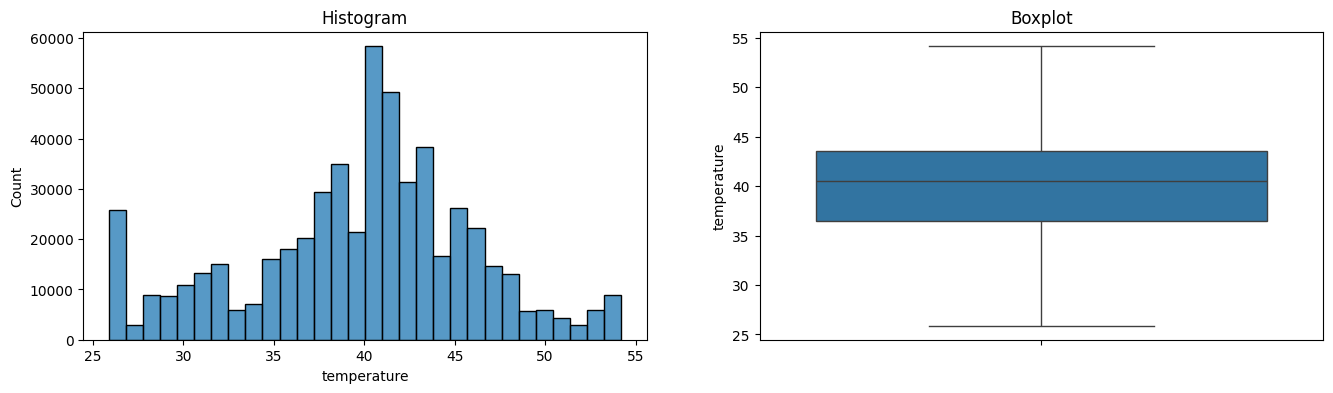

temperatureMin - Before Capping


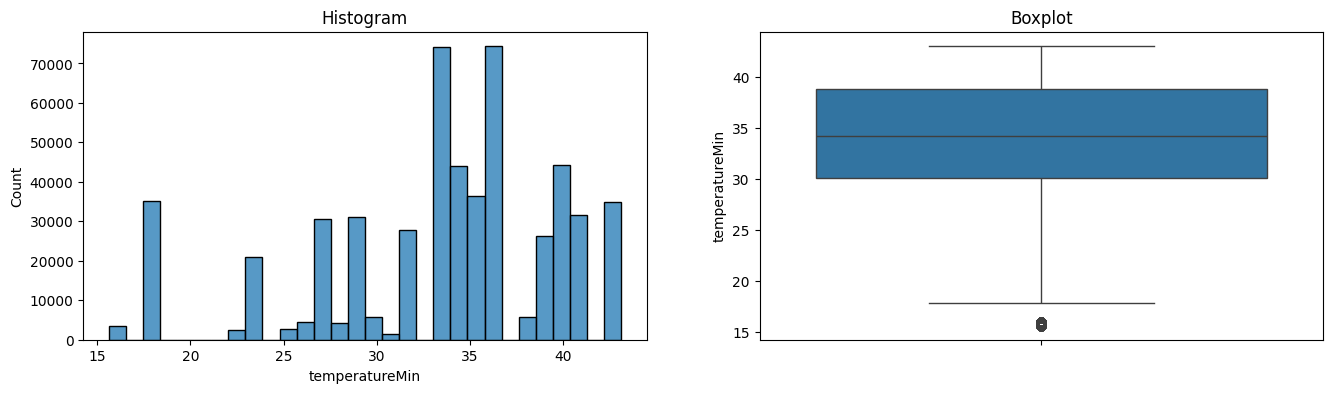


temperatureMin - After Capping


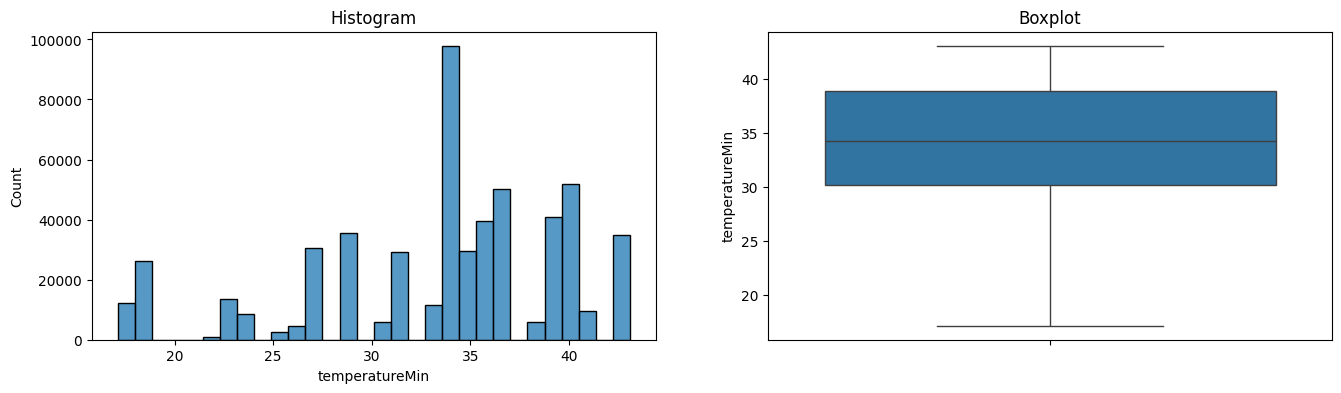

visibility - Before Capping


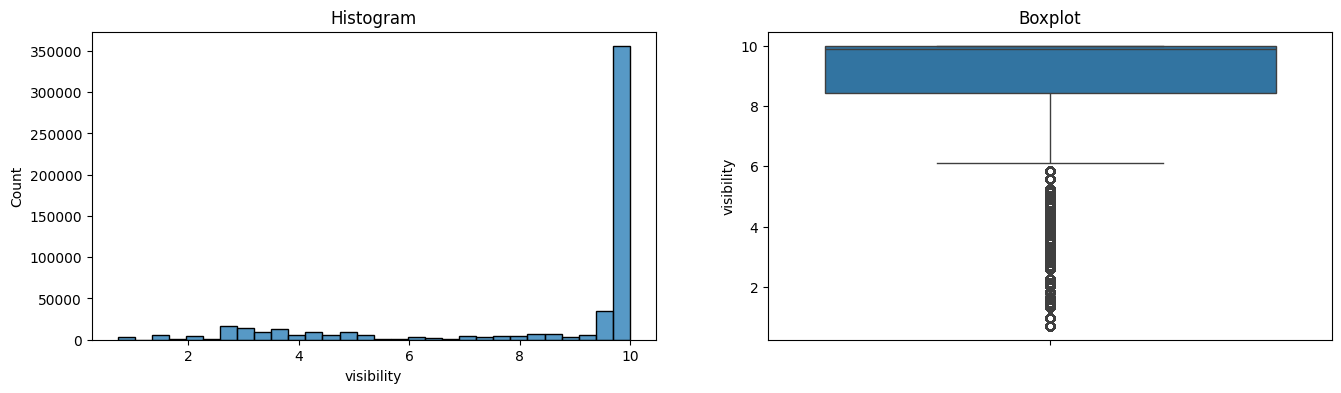


visibility - After Capping


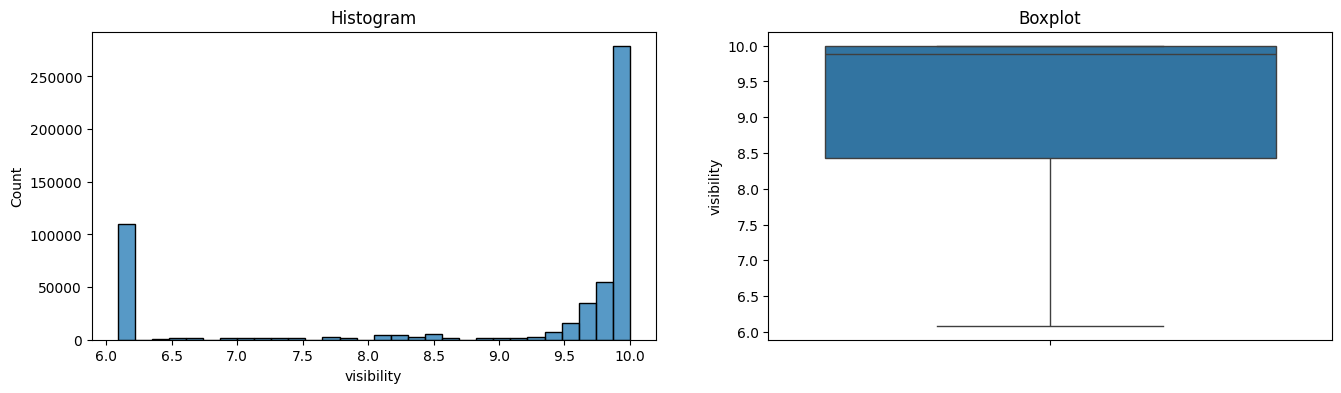

visibility.1 - Before Capping


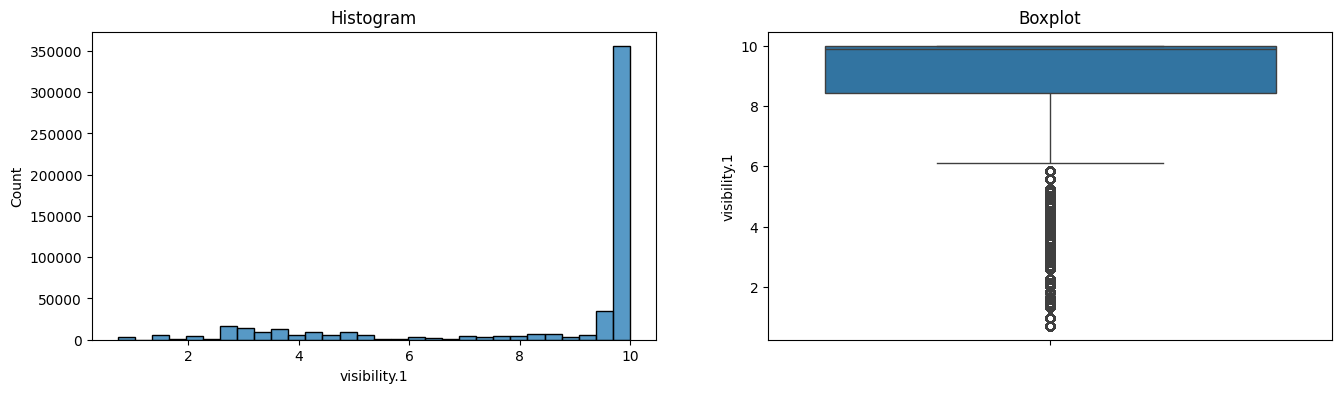


visibility.1 - After Capping


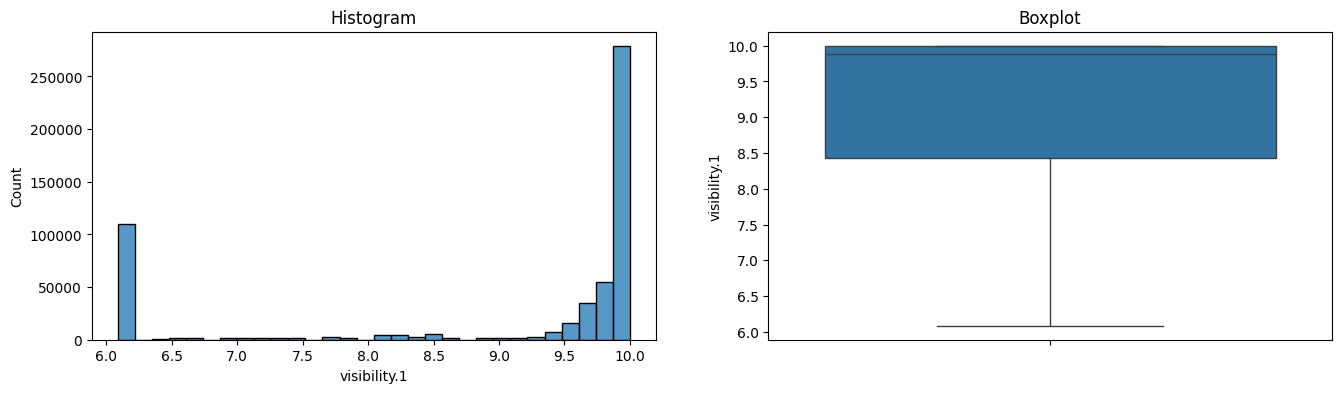

In [27]:
# membuat variabel yang berisi kolom yang mempunyai outlier saja
outliercol = ['apparentTemperatureLow',
 'apparentTemperatureMax',
 'distance',
 'temperature',
 'temperatureMin',
 'visibility',
 'visibility.1']
# loop
for col in outliercol:
    print(f'{col} - Before Capping')
    diagnostic_plots(X_train, col)

    print(f'\n{col} - After Capping')
    diagnostic_plots(X_train_capped, col)

Pembersihan outlier pada kolom-kolom yang memiliki outlier

## Feature Selection

#### Correlation - Categorical Columns

In [28]:
# kolom ordinal
ordinal = ['surge_multiplier','uvIndex']

# Set the significance level (alpha)
alpha = 0.05

# Kendall untuk ordinal kolom
correlation_df_categorical = pd.DataFrame(columns=['categorical_column', 'tau-statistic', 'p-value', 'is_correlated'])

for cat_column in ordinal:
    # mengubah categori mejadi urutan 
    cat_column_num = X_train_capped[cat_column].astype('category').cat.codes
    y_train_num = y_train.astype('category').cat.codes
    
    tau, p = kendalltau(cat_column_num, y_train_num)
    
    is_correlated = 'Yes' if p < alpha else 'No'
    
    # menggunakan concat untuk menggabungkan dataframes
    correlation_df_categorical = pd.concat([
        correlation_df_categorical,
        pd.DataFrame({'categorical_column': [cat_column], 'tau-statistic': [tau], 'p-value': [p], 'is_correlated': [is_correlated]})
    ], ignore_index=True)

# Print the Kendall's Tau test
correlation_df_categorical

/var/folders/yk/nt4l65gx6y11qv4p0t8p00wh0000gq/T/ipykernel_22797/1180480514.py:20: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



,categorical_column,tau-statistic,p-value,is_correlated
0,surge_multiplier,0.136967,0.000000,Yes
1,uvIndex,0.000354,0.751926,No


In [29]:
# Nominal kolom
nom_columns = X_train.select_dtypes(include=['object'])

# Set the significance level (alpha)
alpha = 0.05

# chi square untuk nominal kolom
correlation_df_categorical = pd.DataFrame(columns=['categorical_column', 'chi2-statistic', 'p-value', 'is_correlated'])

for cat_column in nom_columns:
    contingency_table = pd.crosstab(X_train_capped[cat_column], y_train)
    chi2, p, _, _ = chi2_contingency(contingency_table)
    
    is_correlated = 'Yes' if p < alpha else 'No'
    
    # menggunakan concat untuk menggabungkan dataframes
    correlation_df_categorical = pd.concat([
        correlation_df_categorical,
        pd.DataFrame({'categorical_column': [cat_column], 'chi2-statistic': [chi2], 'p-value': [p], 'is_correlated': [is_correlated]})
    ], ignore_index=True)

# Print the chi-squared test 
correlation_df_categorical

/var/folders/yk/nt4l65gx6y11qv4p0t8p00wh0000gq/T/ipykernel_22797/3930647815.py:17: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



,categorical_column,chi2-statistic,p-value,is_correlated
0,id,7.754590e+07,0.495398,No
1,datetime,4.493476e+06,0.000210,Yes
2,timezone,0.000000e+00,1.000000,No
3,source,7.864786e+04,0.000000,Yes
4,destination,7.701251e+04,0.000000,Yes
5,cab_type,3.308968e+05,0.000000,Yes
6,product_id,1.980670e+06,0.000000,Yes
7,name,1.980670e+06,0.000000,Yes
8,short_summary,1.170819e+03,0.284251,No
9,long_summary,1.415547e+03,0.602062,No


In [30]:
# Numerical kolom
num_columns = X_train.select_dtypes(include=['int64','float64'])
numerical = num_columns[num_columns.columns.difference(['timezone',  'latitude', 'longitude','precipIntensity', 'precipProbability','icon',
        'uvIndexTime', 'temperatureMin','surge_multiplier'
        ])]

# Set the significance level (alpha)
alpha = 0.05

# spearman untuk numerical kolom
correlation_df_num = pd.DataFrame(columns=['numerical column', 'correlation-statistic', 'p-value', 'is_correlated'])

for cont_column in numerical:
    corr, p = spearmanr(X_train_capped[cont_column], y_train)
    
    is_correlated = 'Yes' if p < alpha else 'No'
    
    correlation_df_num = pd.concat([
        correlation_df_num,
        pd.DataFrame({'numerical column': [cont_column], 'correlation-statistic': [corr], 'p-value': [p], 'is_correlated': [is_correlated]})
    ], ignore_index=True)

# Print the correlation test 
correlation_df_num

/var/folders/yk/nt4l65gx6y11qv4p0t8p00wh0000gq/T/ipykernel_22797/4278284745.py:18: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



,numerical column,correlation-statistic,p-value,is_correlated
0,apparentTemperature,0.000034,0.979908,No
1,apparentTemperatureHigh,0.000402,0.767292,No
2,apparentTemperatureHighTime,-0.000438,0.747156,No
3,apparentTemperatureLow,0.001272,0.348869,No
4,apparentTemperatureLowTime,-0.000299,0.825603,No
5,apparentTemperatureMax,0.000385,0.777045,No
6,apparentTemperatureMaxTime,-0.000438,0.747156,No
7,apparentTemperatureMin,0.000618,0.649290,No
8,apparentTemperatureMinTime,-0.000311,0.819113,No
9,cloudCover,0.000847,0.532982,No


In [31]:
ordinal = ['surge_multiplier']

nominal = ['source', 'destination', 'cab_type','name'  ]

numerical = ['distance']

print(f'final column that will be used are : {len(ordinal+nominal+numerical)} columns in total')


final column that will be used are : 6 columns in total


Kolom yang akan digunakan adalah 6 kolom. <br>
Disini saya tidak memasukkan kolom `id` dan `datetime` dikarenakan nilai kardinalitas yang tinggi dan datetime sudah diwakilkan oleh kolom `day`,`month`, `hour` dan tidak memiliki korelasi. kolom `moonphase` juga tidak digunakan dikarenakan nilai korelasi yang terlalu kecil `-0.002705`

### Encoding

In [32]:
# Separeted the train set into nominal, ordinal and numerical
X_train_cat_ohe = X_train_capped[nominal]
X_train_cat_ordinal = X_train_capped[ordinal]
X_train_num = X_train_capped[numerical]

# memisahkan test set menjadi nominal, ordinal dan numerikal
X_test_cat_ohe = X_test_capped[nominal]
X_test_cat_ordinal = X_test_capped[ordinal]
X_test_num = X_test_capped[numerical]

In [33]:
# Define encoder
ohe_encoder = OneHotEncoder(handle_unknown='ignore')

# Fit the One Hot Encoder
ohe_encoder.fit(X_train_cat_ohe)

# Transform the train and test set
X_train_ohe_encoded = ohe_encoder.transform(X_train_cat_ohe).toarray()
X_test_ohe_encoded = ohe_encoder.transform(X_test_cat_ohe).toarray()

# Extract the feature name dari encoder
encoded_cols = ohe_encoder.get_feature_names_out()

In [34]:
# Define the order of categories for each column
# isi order harus sama dengan nilai unik surge multiplier
categories = [
    [1.  , 1.25, 1.5, 1.75, 2.  ,2.5 , 3.  ],  # surge multiplier
    
]

# Create the ordinal encoder
ordinal_encoder = OrdinalEncoder(categories=categories)

# Fit the Ordinal Encoder
ordinal_encoder.fit(X_train_cat_ordinal)

# Transform the train and test set
X_train_ordinal_encoded = ordinal_encoder.transform(X_train_cat_ordinal)
X_test_ordinal_encoded = ordinal_encoder.transform(X_test_cat_ordinal)

### Scaling

In [35]:
# define scaller
scaler = StandardScaler()

# fit scaller into numerical x train
scaler.fit(X_train_num)

# transform numerical x train
X_train_scaled = scaler.transform(X_train_num)
X_test_scaled = scaler.transform(X_test_num)

# show data
X_train_scaled

array([[-0.92520055],
       [ 0.94047729],
       [ 1.45670853],
       ...,
       [ 0.39707597],
       [ 0.92236391],
       [ 0.12537532]])

Menggunakan standard scaller dikarenakan outlier data sudah dihandle sehingga nilai outlier sudah tidak signifikan.

In [36]:
# menggabungkan categorical dan numerical train set 
X_train_final = np.concatenate([X_train_ohe_encoded,X_train_ordinal_encoded,X_train_scaled],axis=1)

# membuat dataframe
X_train_final = pd.DataFrame(X_train_final, columns = encoded_cols.tolist() + ordinal + numerical)

# menggabungkan categorical dan numerical tran test
X_test_final = np.concatenate([X_test_ohe_encoded,X_test_ordinal_encoded,X_test_scaled],axis=1)

# membuat dataframe
X_test_final = pd.DataFrame(X_test_final, columns = encoded_cols.tolist() + ordinal + numerical)

# print hasil
print(f'Train set Final {X_train_final.shape}\n')
display(X_train_final.head())
print(f'Test set Final {X_test_final.shape}\n')
display(X_test_final.head())

Train set Final (542279, 40)



,source_Back Bay,source_Beacon Hill,source_Boston University,source_Fenway,source_Financial District,source_Haymarket Square,source_North End,source_North Station,source_Northeastern University,source_South Station,...,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV,surge_multiplier,distance
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.925201
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.940477
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.456709
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.614437
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.151618


Test set Final (95697, 40)



,source_Back Bay,source_Beacon Hill,source_Boston University,source_Fenway,source_Financial District,source_Haymarket Square,source_North End,source_North Station,source_Northeastern University,source_South Station,...,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV,surge_multiplier,distance
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.886137
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.581046
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.010475
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.345572
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.786514


- Train set memiliki 542.279 row dan 40 kolom
- Test set memiliki 95.697 row dan 40 kolom

# Model Definition

In [37]:
# Define the model
model = LinearRegression()
# nilai default parameter tanpa disi adalah fit_intercept true dan normalize false

Pemilihan liner regression memiliki beberapa alasan diantaranya adalah:
- guide GC4
- metode paling sederhana yang dapat memprediksi input dan output secara langsung
- asumsi yang jelas
- dapat mengidentifikasi variabel variabel yang memiliki pengaruh signifikan terhadap hasil yang ingin diprediksi

Nilai default parameter adalah `fit_intercept=True` dan `normalize=False`. Fit intercept digunakaan agar model memperhitungkan intercept dalam persamaan regresi. Normalize tidak digunakan agar nilai fitur tidak diubah.

untuk pemilihan metrics evaluation yang akan digunakan adalah RMSE. RMSE cocok digunakan untuk memprediksi harga dikarenakan RMSE mempunyai sensitivitas yang tinggi terhadap kesalahan besar dan memiliki konsistensi. usaya akan tetap memperlihatkan nilai dari metrics yang lain seperti MAE, MSE dan Rsquare untuk membandingan hasil nilai antar metrics.

# Model Training

In [38]:
# Train the model
model.fit(X_train_final, y_train)

LinearRegression()

In [39]:
# Check coefficients and intercept

slope = model.coef_
intercept = model.intercept_

params = {
    'feature': X_train_final.columns.tolist(),
    'slope': model.coef_.tolist()
}

print('Intercept : ', intercept)
pd.DataFrame(params)

Intercept :  11047598014873.486


,feature,slope
0,source_Back Bay,9.248561e+11
1,source_Beacon Hill,9.248561e+11
2,source_Boston University,-8.049453e+12
3,source_Fenway,-8.049453e+12
4,source_Financial District,9.248561e+11
5,source_Haymarket Square,-8.049453e+12
6,source_North End,-8.049453e+12
7,source_North Station,9.248561e+11
8,source_Northeastern University,-8.049453e+12
9,source_South Station,-8.049453e+12


- Intercept: Menunjukkan nilai prediksi variabel target ketika semua variabel fitur memiliki nilai nol.
- Slope: Menunjukkan perubahan dalam variabel target untuk setiap unit perubahan dalam variabel prediktor yang bersangkutan atau garis miring diantara titik sebelum perubahan dan sesudah perubahan.
<br>
Maka ketika nilai variabel fitur 0 harga price atau target bernilai 11047598014873.486. lalu untuk slope ketika perjalanan berasal dari backbay maka harga akan ditambah senilai 9.248561e+11.

Nilai intercept yang tinggi dapat terjadi dikarenakan beberapa faktor, diantaranya adalah data yang tidak centered. Berikut hasil setelah melakukan centered data:

In [40]:
# melakukan centered data dengan mengurangi dengan nilai mean
X_centered = X_train_final - X_train_final.mean()

model_centered = LinearRegression().fit(X_centered, y_train)
slope_centered = model_centered.coef_
intercept_centered = model_centered.intercept_
params_centered = {
    'feature': X_centered.columns.tolist(),
    'slope': slope_centered.tolist()
}

print('Intercept : ', intercept_centered)
pd.DataFrame(params_centered)


Intercept :  16.54445300457688


,feature,slope
0,source_Back Bay,9.078385e+11
1,source_Beacon Hill,9.078385e+11
2,source_Boston University,-4.229991e+12
3,source_Fenway,-4.229991e+12
4,source_Financial District,9.078385e+11
5,source_Haymarket Square,-4.229991e+12
6,source_North End,-4.229991e+12
7,source_North Station,9.078385e+11
8,source_Northeastern University,-4.229991e+12
9,source_South Station,-4.229991e+12


Maka ketika nilai variabel fitur 0 harga price atau target bernilai 16.54445300457688. lalu untuk slope ketika perjalanan berasal dari backbay maka harga akan ditambah senilai 9.078385e+11.

# Model Evaluation

In [41]:
# membuat dataframe 
result = pd.DataFrame(columns=['Model', 'Data', 'MAE_train', 'MAE_test', 'MSE_train', 'MSE_test', 'RMSE_train',
                               'RMSE_test', 'R2_train', 'R2_test'])

# Membuat function untuk model evaluation
def evaluate_model(dataframe, train_x, train_y, test_x, test_y, model, data_name):
    # Train the model
    model.fit(train_x, train_y)

    # Predict Train set
    y_pred_train = model.predict(train_x)
    # Predict test set
    y_pred_test = model.predict(test_x)

    # Calculate MAE
    mae_train = mean_absolute_error(train_y, y_pred_train)
    mae_test = mean_absolute_error(test_y, y_pred_test)

    # Calculate MSE
    mse_train = mean_squared_error(train_y, y_pred_train)
    mse_test = mean_squared_error(test_y, y_pred_test)
    
    # Calculate RMSE
    rmse_train = mean_squared_error(train_y, y_pred_train, squared=False)
    rmse_test = mean_squared_error(test_y, y_pred_test, squared=False)

    # Calculate R2 score
    r2_train = r2_score(train_y, y_pred_train)
    r2_test = r2_score(test_y, y_pred_test)
    
    # Create a DataFrame for the new row
    new_row = pd.DataFrame({
        'Model': [model], 'Data': [data_name], 'MAE_train': [mae_train], 'MAE_test': [mae_test], 'MSE_train': [mse_train],
        'MSE_test': [mse_test], 'RMSE_train': [rmse_train], 'RMSE_test': [rmse_test],
        'R2_train': [r2_train], 'R2_test': [r2_test]
    })
    
    # Concatenate the new row with the existing DataFrame
    dataframe = pd.concat([dataframe, new_row], ignore_index=True)

    return dataframe 


In [42]:
# Data with outliers
result = evaluate_model(result, X_train_final, y_train, X_test_final, y_test, model, 'With Capping')
result

/opt/miniconda3/envs/phase1/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.

/opt/miniconda3/envs/phase1/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.

/var/folders/yk/nt4l65gx6y11qv4p0t8p00wh0000gq/T/ipykernel_22797/669123116.py:39: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



,Model,Data,MAE_train,MAE_test,MSE_train,MSE_test,RMSE_train,RMSE_test,R2_train,R2_test
0,LinearRegression(),With Capping,1.749755,1.739431,6.135516,6.063299,2.476997,2.462377,0.92948,0.929986


**MAE** =  memiliki nilai selisih antara training dan test yang rendah sehingga menunjukkan bahwa model memiliki performa yang baik dan stabil<br>

**MSE** = memiliki nilai selisih yang rendah sehingga model tidak mengalami overfitting atau underfiting yang signifikan

**RMSE** = memiliki nilai selisih yang rendah ataupun konsisten menunjukan model dapat memprediksi dengan baik dan tidak terlalu dipengaruhi oleh nilai outlier

**R-squared** = nilai r square sebesar 0.93 menunjukkan bahwa model dapat menjelaskan sekitar 93% variabilitas data

# Model Saving

In [43]:
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)

with open('scaller.pkl', 'wb') as file:
    pickle.dump(scaler, file)

with open('enc.pkl', 'wb') as file:
    pickle.dump(ordinal_encoder, file)
    
with open('enc2.pkl', 'wb') as file:
    pickle.dump(ohe_encoder, file)

# Model Inference

In [44]:
predictions = model.predict(X_test_final)
print(predictions)

[34.33203125 16.94921875 30.22070312 ... 18.9921875  18.28320312
 22.51171875]


In [45]:
y_test

560731    34.0
587004    16.5
370821    29.0
617910    11.0
200433    10.5
          ... 
403933    19.0
535379    10.5
303478    16.5
213011    16.5
39125     19.5
Name: price, Length: 95697, dtype: float64

Perbandingan prediksi antara x test dan y test dimana selisihnya tidak terlalu jauh

## Asumsi pada Linear Regression

Terdapat 5 Asumsi pada linear regression yaitu:

1. Asumsi Linear Relationship = Hubungan antara variabel independent dan dependent bersifat linear dimana jika variabel X berubah maka variabel Y juga berubah dengan cara yang sama. contoh seperti jika 2 hal berkaitan seperti jarak dan harga, asumsi linear akan mengatakan bahwa semakin jauh jarak yang ditempuh maka nilai price atau harga akan naik dengan jumlah yang sama.
2. Asumsi tidak ada multikolinearitas = tidak ada hubungan yang kuat antara dua atau lebih variabel independen dalam model. contohnya seperti ada 2 variabel yang mempengaruhi price, namun 2 variabel ini tidak ada hubungan ato dapat mempengaruhi satu sama lain
3. Asumsi Multivariate normality = berasumsi bahwa variabel dalam analisis memiliki distribusi normal saat dipertimbangkan **bersama sama**.
4. Asumsi tidak ada auto korelasi = tidak korelasi antara nilai nilai yang berurutan dalam data. korelasi mengacu pada hubungan antara nilai data pada waktu yang berbeda. contohnya harga perjalanan uber bulan ini tidak ada hubungannya dengan harga perjalanan uber pada bulan lalu.
5. Asumsi homoscedasticity = nilai varibilitas dari variabel dependen adalah konstan disemua tingkat nilai variabel independen. atau nilai variasi tetap konsisten di semua kondisi, seperti memprediksi harga rumah dengan menggunakan asumsi ini maka nilai variasi harga tidak jauh berbeda antara semua jenis rumah.

# Kesimpulan

**Kesimpulan** 
-  Dataset memiliki 693.071 row dan memiliki 57 columns
- dari 57 kolom, fitur yang digunakan hanya 6 kolom
- terdapat banyak kolom yang tidak berkorelasi terhadap target
- terdapat missing values pada kolom price yang dikategorikan sebagai MAR
- terdapat 7 kolom dengan outlier
- data memiliki nilai kardinalitas yang rendah kecuali pada kolom datetime dan id
- model yang digunakan adalah linear regression
- Data Preprocessing: Dilakukan proses capping pada data.
- model memiliki nilai intercept yang tinggi sebelum dilakukannya centered data
- namun nilai slope masih tinggi walaupun sudah dilakukannya centered data
- model tidak menghasilkan nilai yang overfitting atau underfitting
- nilai RMSE memiliki selisih yang kecil menunjukkan bahwa model memiliki nilai prediksi yang baik
- model memiliki performa yang baik dan stabil

Dengan menggunakan model linear regression dan proses capping pada data, data menunjukan performa yang baik, dengan nilai MAE dan RMSE yang relatif rendah baik pada data train maupun test. hal ini menunjukan bahwa model mampu memprediksi variabel target dengan akurat pada data yang telah diproses dengan baik

In [46]:
test = df[123:123].to_dict()

In [47]:
test2 = pd.DataFrame(test)

In [48]:
from sklearn.pipeline import Pipeline

In [49]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),   # Step to scale the features
    ('regressor', LinearRegression())  # Step to apply Linear Regression
])

In [50]:
# Step 5: Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Step 6: Make predictions using the pipeline
predictions = pipeline.predict(X_test)

# Step 7: Evaluate the model (Optional)
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

ValueError: could not convert string to float: 'ff192547-e09e-43bc-b002-fbefea3d83d7'

In [ ]:
test = df.head(3).to_dict()
test

In [1]:
test2 = {'limit_balance': {0: 120000.0, 1: 290000.0, 2: 51000.0},
 'sex': {0: 1, 1: 2, 2: 1},
 'education_level': {0: 2, 1: 2, 2: 3},
 'marital_status': {0: 1, 1: 2, 2: 1},
 'age': {0: 24.0, 1: 39.0, 2: 62.0},
 'pay_0': {0: 1, 1: -1, 2: 3},
 'pay_2': {0: -1, 1: 2, 2: 3},
 'pay_3': {0: 5, 1: 1, 2: 2},
 'pay_4': {0: 3, 1: 2, 2: -2},
 'pay_5': {0: 1, 1: 0, 2: 4},
 'pay_6': {0: -2, 1: -2, 2: 1},
 'bill_amt_1': {0: 31454.0, 1: 89221.0, 2: 24568.0},
 'bill_amt_2': {0: 50808.0, 1: 54599.0, 2: 11420.0},
 'bill_amt_3': {0: 61290.0, 1: 14942.0, 2: 42535.0},
 'bill_amt_4': {0: 1296.0, 1: 4146.0, 2: 6434.0},
 'bill_amt_5': {0: 29210.0, 1: 45235.0, 2: 200.0},
 'bill_amt_6': {0: 15643.0, 1: 90984.0, 2: 0.0},
 'pay_amt_1': {0: 7545.0, 1: 1689.0, 2: 5641.0},
 'pay_amt_2': {0: 1208.0, 1: 3164.0, 2: 3019.0},
 'pay_amt_3': {0: 2336.0, 1: 4500.0, 2: 800.0},
 'pay_amt_4': {0: 1232.0, 1: 4480.0, 2: 100.0},
 'pay_amt_5': {0: 742.0, 1: 4500.0, 2: 1900.0},
 'pay_amt_6': {0: 398.0, 1: 5000.0, 2: 10.0},
 'default_payment_next_month': {0: 0, 1: 0, 2: 1}}
 # diubah isinya untuk inference

In [2]:
test2 = pd.DataFrame(test2)
test2
# jadiin dataframe

NameError: name 'pd' is not defined

In [ ]:
test2.to_csv('P1G5_Heru_Inference.csv',index=False)
# export menjadi csv

In [ ]:
predictions = modelsvc.predict(test2)
print(predictions)
# prediksi